# Nematic Liquid Crystal tutorial: 2D Active Nematic

Here we are going to look at some basic properties of the active nematic class in two dimensions. This class have a lot of parameters that are described in the documentation. Here is a quick overview with the defult values and the key word if you want to initialise them with another value:

self.alpha = -1  (keyword: 'alpha')

self.K = 1  (Keyword 'K') 

self.A = 1  (Keyword 'A')

self.B = 1  (Keyword 'B')

self.C = 0  (Keyword 'C') Note: does not do anything in two dimensions
       
self.gamma = 1  (Keyword 'gamma') Note: do not put to zero (see documentation)

self.Gamma = 0  (Keyword 'Gamma') Note: be carefull not to mistake "Gamma" and "gamma"  

self.eta = 1  (Keyword 'eta' ) 

Lets now start by initialising the nematic class.



In [1]:
# !pip install comfit -q
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

nem = cf.NematicLiquidCrystal(2,xRes=64,yRes=64,dx=1,dy=1,dt=0.1)

There are two ways to initialise the self.Q tensor parameter. The first is to initialise it as a nematic with the nematogens pointing in the x-direction (+ noise). This is done with the function

self.conf_initial_condition_ordered(self, noise_strength=0.01),

noise_strength is here the noise in the angle.

The other way of initialising is by the function

self.conf_insert_disclination_dipole(self, dipole_vector=None, dipole_position=None)

Which initialises a dipol in the system. It can also be used in an already defined system. Once the dipole is initialised the system can be relaxed using the function

self.evolve_nematic_no_flow(self,number_of_steps,method = 'ETD2RK'),
to make the defect cores.

This function evolves the nematic without coupling it to a flow field, i.e it minimises the free energy.

The degree of order S and the director can be found by the function 

S,director =nem.calc_order_and_director() and ploted with the standard plotting functions. 



In [ ]:
#task 1: initialise a dipole pair and evolve the nematic for 10 time-steps using
#    the evolve_nematic_no_flow(self,number_of_steps,method = 'ETD2RK') function
#    plot the director and degree of order.
   



To make the system active we need to evolve with the flow field. This is done with the function 

evolve_nematic(self, number_of_steps, method= 'ETD2RK') 

This function also updates the velocity field. 

The defect density field in the nematic can be found by the function calc_defect_density_nematic(), while the defect nodes can be found with the function

calc_disclination_nodes_nem(self, dt_Q=None,polarization = None,charge_tolerance=None),

these works in the same way as the corresponding functions in the Bose Einstein condensate class. The polarization of the positive defect can be found by puting in the field

polarization = nem.calc_defect_polarization_field() 

in for the polarization keyword.

To plot a scalar field, velocity field and director field in the same function the nematic class contains the function

plot_field_velocity_and_director(self, field, velocity, director, ax=None, colorbar=True, colormap='viridis',
                                         cmax=None, cmin=None,
                                         number_of_layers=1, hold=False):



In [ ]:
#task 2: Evolve the system for 10 time steps using the evolve_nematic(self, number_of_steps, method= 'ETD2RK') 
# function. Plot the defect denisty field, velocity field and director field.
# Track the defects and plot them using the function plot_disclination_nodes(self, vortex_nodes, ax=None) 

In [ ]:
# task 3: make an animation of the defect anilation prosses. 



In [ ]:
# extra tasks 1: Initialise multiple defect pairs and have fun


# Solutions


evolving the active nematic: 100%|██████████| 10/10 [00:00<00:00, 48.53it/s]


(64, 64)
(64, 64)
(64, 64)


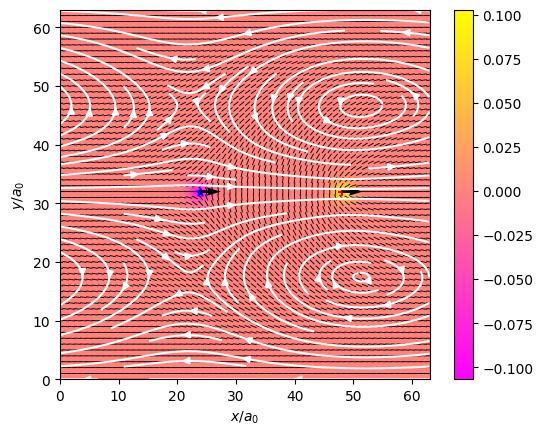

In [3]:
# Task 1 + 2 for animation see e.g 2.2 - BoseEinsteinCondensate tutorial: Time dependent potentials
import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

nem = cf.NematicLiquidCrystal(2,xRes=64,yRes=64,dx=1,dy=1,dt=0.1,alpha=1)



nem.conf_insert_disclination_dipole()
nem.evolve_nematic_no_flow(10)



Q_prev = np.copy(nem.Q)
nem.evolve_nematic(10,"ETD4RK")

dt_Q = (nem.Q -Q_prev)/(10*nem.dt)

polarization = nem.calc_defect_polarization_field()
D = nem.calc_defect_density_nematic()
S,director =nem.calc_order_and_director()

Dnodes =nem.calc_disclination_nodes_nem(dt_Q =dt_Q)


ax =nem.plot_field_velocity_and_director(D,nem.u,director,colormap='spring')

nem.plot_disclination_nodes(Dnodes,ax=ax)

plt.show()